In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from matplotlib import style
%matplotlib inline
warnings.filterwarnings('ignore')
%precision 2

'%.2f'

In [3]:
df= pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## Renaming 

In [5]:
df = df.rename({'race/ethnicity':'race','parental level of education':'qualification','test preparation course':'course','math score':'maths','reading score':'reading','writing score':'writing'},axis=1)

In [6]:
df.head()

,gender,race,qualification,lunch,course,maths,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Basic analyse 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   race           1000 non-null   object
 2   qualification  1000 non-null   object
 3   lunch          1000 non-null   object
 4   course         1000 non-null   object
 5   maths          1000 non-null   int64 
 6   reading        1000 non-null   int64 
 7   writing        1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,maths,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.describe

<bound method NDFrame.describe of      gender     race       qualification         lunch     course  maths  \
0    female  group B   bachelor's degree      standard       none     72   
1    female  group C        some college      standard  completed     69   
2    female  group B     master's degree      standard       none     90   
3      male  group A  associate's degree  free/reduced       none     47   
4      male  group C        some college      standard       none     76   
..      ...      ...                 ...           ...        ...    ...   
995  female  group E     master's degree      standard  completed     88   
996    male  group C         high school  free/reduced       none     62   
997  female  group C         high school  free/reduced  completed     59   
998  female  group D        some college      standard  completed     68   
999  female  group D        some college  free/reduced       none     77   

     reading  writing  
0         72       74  
1    

In [10]:
df.value_counts()

gender  race     qualification       lunch         course     maths  reading  writing
female  group A  associate's degree  free/reduced  none       37     57       56         1
male    group C  associate's degree  standard      completed  57     54       56         1
                                     free/reduced  completed  60     51       56         1
                                                              65     67       65         1
                                                                     73       68         1
                                                                                        ..
female  group D  associate's degree  standard      none       71     71       74         1
                                                              74     81       83         1
                                                              76     74       73         1
                                                              77     77       73         1
male

In [11]:
df.isnull().value_counts()

gender  race   qualification  lunch  course  maths  reading  writing
False   False  False          False  False   False  False    False      1000
dtype: int64

<AxesSubplot:>

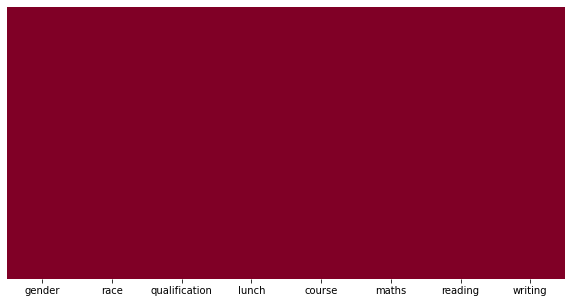

In [12]:
figure = plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlOrRd_r')

In [13]:
categorical = [var for var in df.columns if df[var].dtype=='O'] 
categorical

['gender', 'race', 'qualification', 'lunch', 'course']

In [14]:
df.value_counts().count()

1000

array([[<AxesSubplot:title={'center':'maths'}>,
        <AxesSubplot:title={'center':'reading'}>],
       [<AxesSubplot:title={'center':'writing'}>, <AxesSubplot:>]],
      dtype=object)

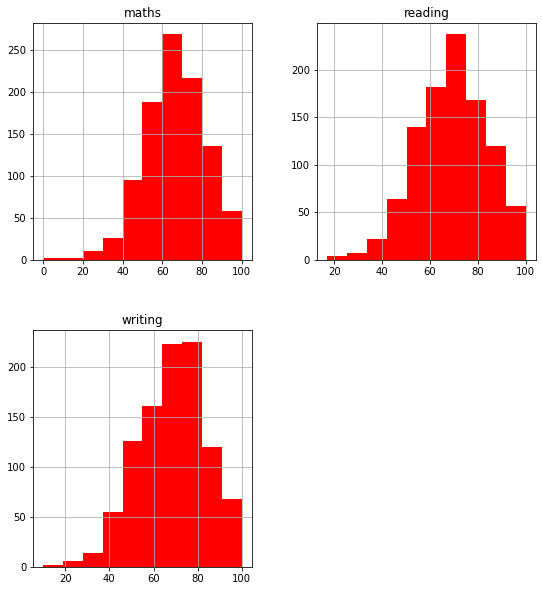

In [15]:
df.hist(figsize=(9,10),color='red')   

In [16]:
df.corr()

,maths,reading,writing
maths,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


<AxesSubplot:>

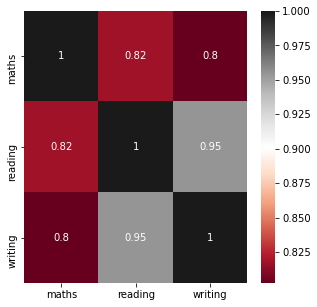

In [17]:
figure = plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True , cmap="RdGy")

#Gender

In [18]:
df['gender'].count()

1000

In [19]:
df['gender'].describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

female    518
male      482
Name: gender, dtype: int64

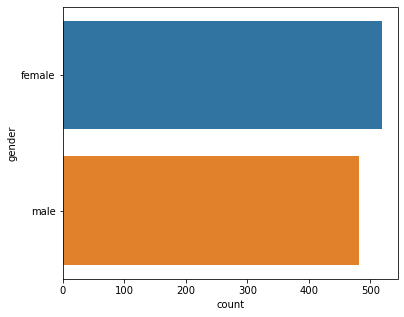

In [20]:
plt.figure(figsize = (6,5)) 
sns.countplot(y='gender',data = df) 
df['gender'].value_counts()

In [21]:
df['race'].count()

1000

In [22]:
df['race'].describe()

count        1000
unique          5
top       group C
freq          319
Name: race, dtype: object

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

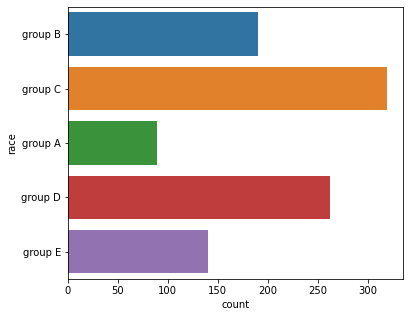

In [23]:
plt.figure(figsize = (6,5)) 
sns.countplot(y='race',data = df) 
df['race'].value_counts()

In [24]:
df['qualification'].count()

1000

In [25]:
df['qualification'].describe()

count             1000
unique               6
top       some college
freq               226
Name: qualification, dtype: object

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: qualification, dtype: int64

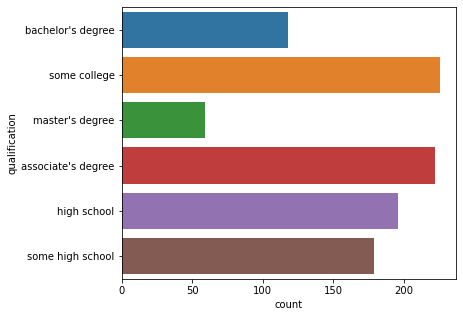

In [26]:
plt.figure(figsize = (6,5)) 
sns.countplot(y='qualification',data = df) 
df['qualification'].value_counts()

In [27]:
df['qualification'].nunique()

6

In [28]:
df['lunch'].count()

1000

In [29]:
df['lunch'].describe()

count         1000
unique           2
top       standard
freq           645
Name: lunch, dtype: object

standard        645
free/reduced    355
Name: lunch, dtype: int64

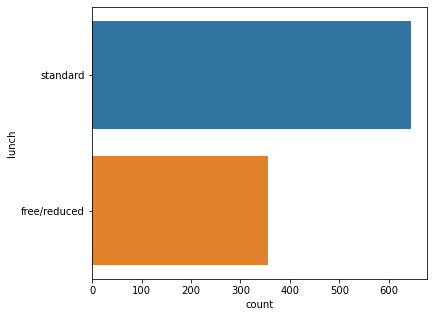

In [30]:
plt.figure(figsize = (6,5)) 
sns.countplot(y='lunch',data = df) 
df['lunch'].value_counts()

In [31]:
df['course'].count()

1000

In [32]:
df['course'].describe()

count     1000
unique       2
top       none
freq       642
Name: course, dtype: object

none         642
completed    358
Name: course, dtype: int64

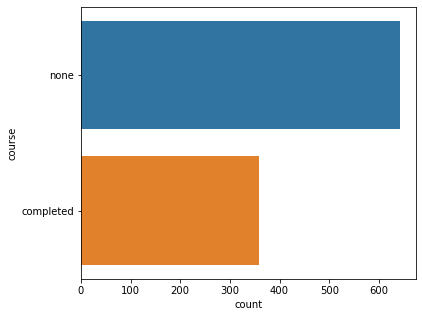

In [33]:
plt.figure(figsize = (6,5)) 
sns.countplot(y='course',data = df) 
df['course'].value_counts()

In [34]:
df['maths'].count()

1000

In [35]:
df['maths'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: maths, dtype: float64

65    36
62    35
69    32
59    32
61    27
Name: maths, dtype: int64

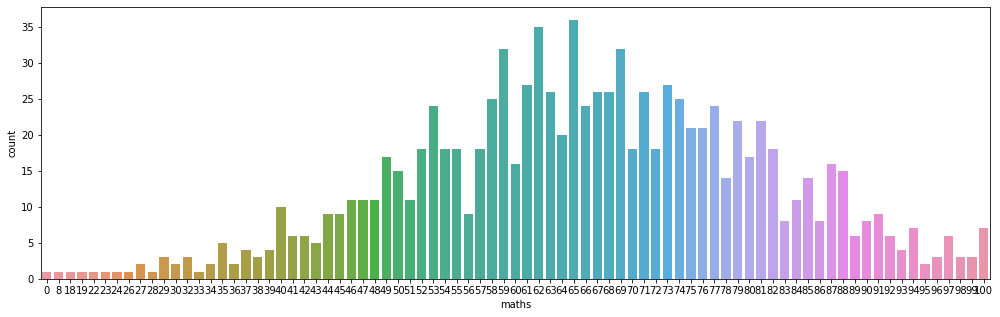

In [36]:
plt.figure(figsize = (17,5)) 
sns.countplot(x='maths',data = df) 
df['maths'].value_counts().head()

In [37]:
df['reading'].count()

1000

In [38]:
df['reading'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading, dtype: float64

72    34
74    33
64    32
67    30
73    30
Name: reading, dtype: int64

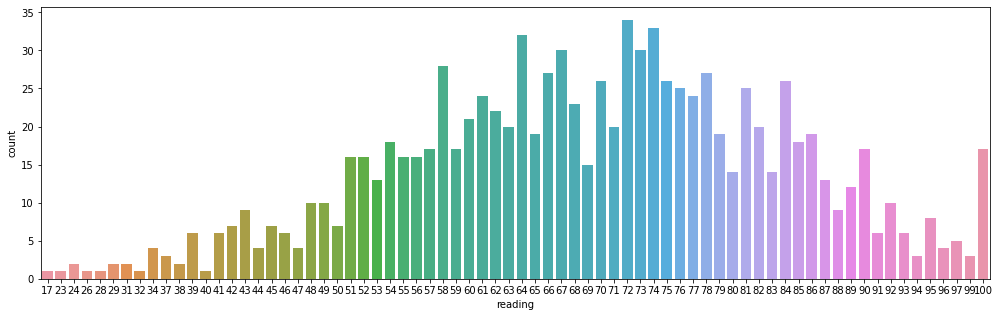

In [39]:
plt.figure(figsize = (17,5)) 
sns.countplot(x='reading',data = df) 
df['reading'].value_counts().head()

In [40]:
df['writing'].count()

1000

In [41]:
df['writing'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing, dtype: float64

74    35
70    33
68    31
73    28
80    27
Name: writing, dtype: int64

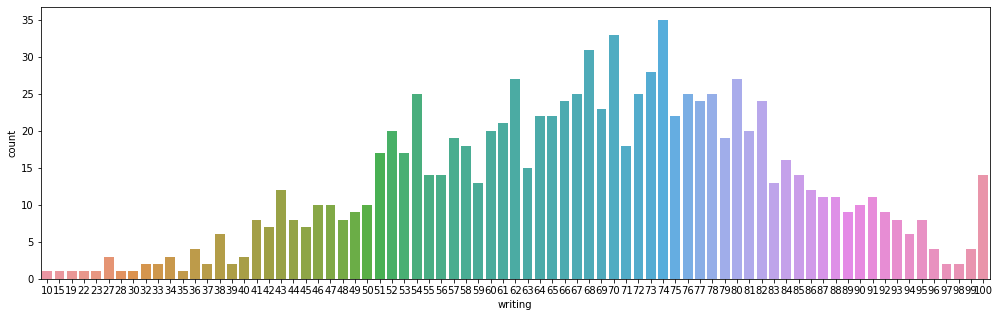

In [42]:
plt.figure(figsize = (17,5)) 
sns.countplot(x='writing',data = df) 
df['writing'].value_counts().head()

## Questions 

#### Find how is gender compare with qualification and lunch? 

In [43]:
f = df[df['gender']=='female'].head(1000)
f = f.rename({'race':'race1'},axis=1)

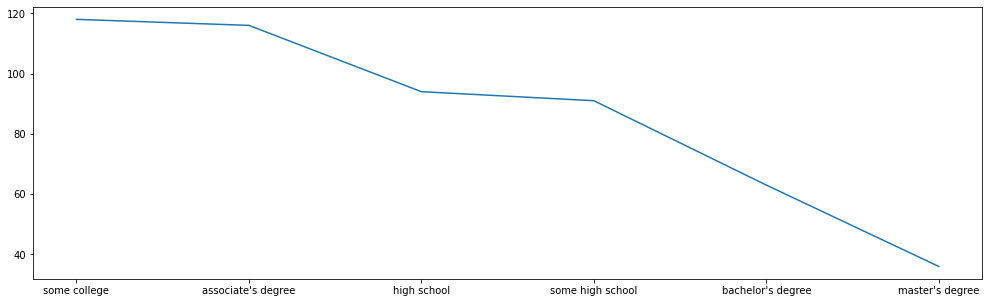

some college          118
associate's degree    116
high school            94
some high school       91
bachelor's degree      63
master's degree        36
Name: qualification, dtype: int64

In [44]:
plt.figure(figsize = (17,5))
plt.plot(f['qualification'].value_counts())
plt.show()
f['qualification'].value_counts() 

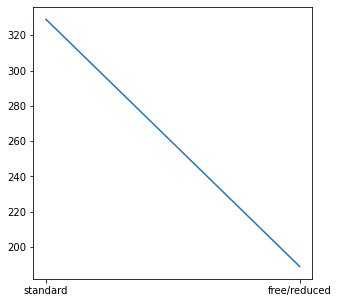

standard        329
free/reduced    189
Name: lunch, dtype: int64

In [45]:
plt.figure(figsize = (5,5))
plt.plot(f['lunch'].value_counts())
plt.show()
f['lunch'].value_counts()

In [46]:
m = df[df['gender']=='male'].head(1000)
m = m.rename({'race':'race2'},axis=1)

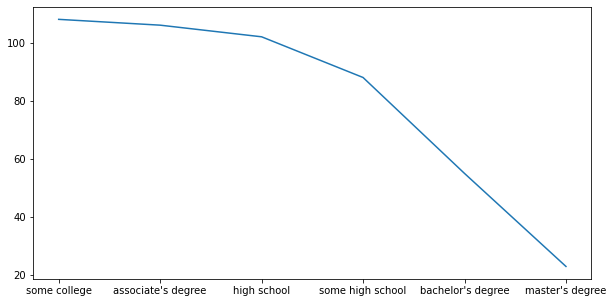

some college          108
associate's degree    106
high school           102
some high school       88
bachelor's degree      55
master's degree        23
Name: qualification, dtype: int64

In [47]:
plt.figure(figsize = (10,5))
plt.plot(m['qualification'].value_counts())
plt.show()
m['qualification'].value_counts()

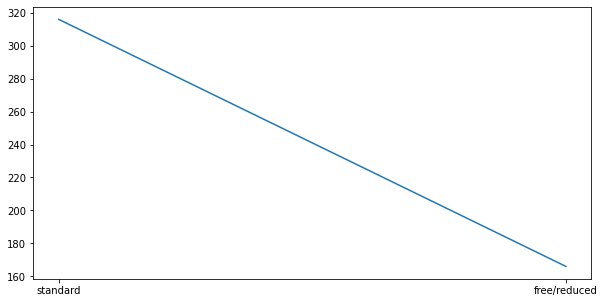

standard        316
free/reduced    166
Name: lunch, dtype: int64

In [48]:
plt.figure(figsize = (10,5))
plt.plot(m['lunch'].value_counts())
plt.show()
m['lunch'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: qualification, dtype: int64

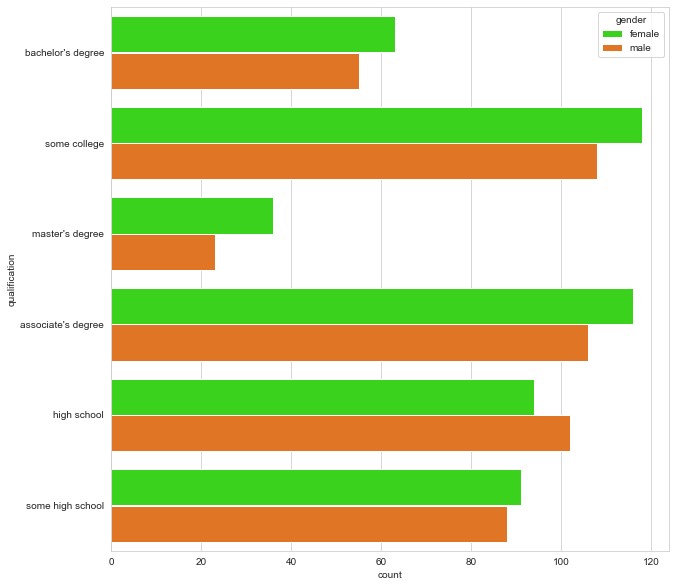

In [49]:
plt.figure(figsize = (10 , 10))
sns.set_style('whitegrid')
sns.countplot(y='qualification',hue='gender',data=df,palette='gist_ncar')
df['qualification'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

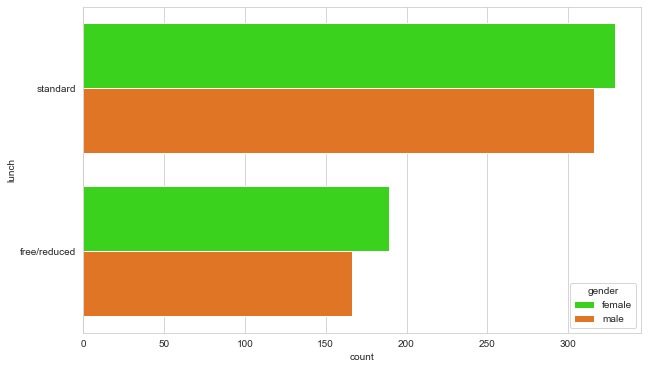

In [50]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(y='lunch',hue='gender',data=df,palette='gist_ncar')
df['lunch'].value_counts()

#### Find the status of race using gender and find the lowest race group?

In [51]:
f1 = pd.DataFrame(f['race1'].value_counts())
m1 = pd.DataFrame(m['race2'].value_counts())
df1 = pd.DataFrame(df['race'].value_counts())

In [52]:
result = pd.concat([f1, m1,df1], axis=1)
result = result.rename({'race1':'female','race2':'male','race':'Total'},axis=1)
result

,female,male,Total
group C,180,139,319
group D,129,133,262
group B,104,86,190
group E,69,71,140
group A,36,53,89


<Figure size 720x432 with 0 Axes>

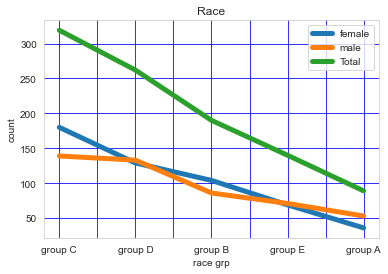

female  male  Total
36      53    89       1
69      71    140      1
104     86    190      1
129     133   262      1
180     139   319      1
dtype: int64

In [53]:
plt.figure (figsize = (10,6))
result.plot(linewidth=5)
plt.title('Race')
plt.ylabel('count')
plt.xlabel('race grp')
plt.grid(True,color='b')
plt.legend()
plt.show()
result.value_counts()

In [54]:
result1 = pd.concat([f1, m1], axis=1)
result1 = result1.rename({'race1':'female','race2':'male'},axis=1)
result1

,female,male
group C,180,139
group D,129,133
group B,104,86
group E,69,71
group A,36,53


female  male
36      53      1
69      71      1
104     86      1
129     133     1
180     139     1
dtype: int64

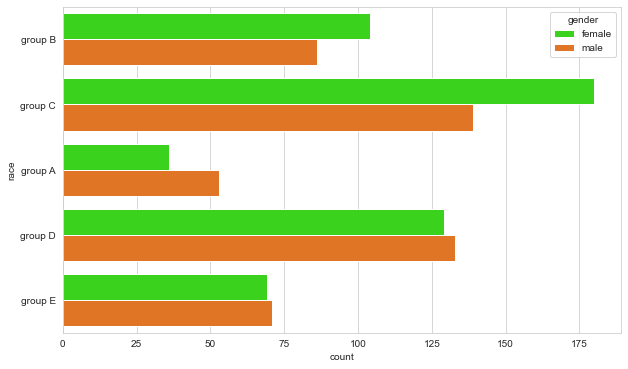

In [55]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(y='race',hue='gender',data=df,palette='gist_ncar')
result1.value_counts()

####  Find the status of course and compare the marks earn by student in maths

In [56]:
df['course'].value_counts()

none         642
completed    358
Name: course, dtype: int64

65    36
62    35
69    32
59    32
61    27
Name: maths, dtype: int64

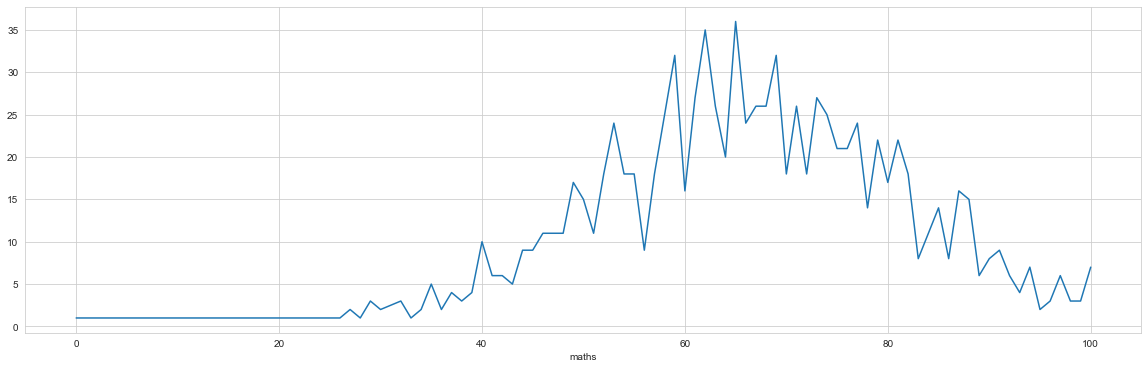

In [57]:
maths = df.groupby(by='maths').count()
plt.figure(figsize = (20,6))
maths['course'].plot()
df['maths'].value_counts().head()

#### Compare all the marks of maths, reading and writing and find the mean , median and mode of the maks ? 

In [58]:
df2 = pd.DataFrame(df['maths'].value_counts())
df3 = pd.DataFrame(df['reading'].value_counts())
df4 = pd.DataFrame(df['writing'].value_counts())


In [59]:
df['maths'].value_counts().iloc[:100].head()

65    36
62    35
69    32
59    32
61    27
Name: maths, dtype: int64

In [60]:
df['reading'].value_counts().iloc[:100].head()

72    34
74    33
64    32
67    30
73    30
Name: reading, dtype: int64

In [61]:
df['writing'].value_counts().iloc[:100].head()

74    35
70    33
68    31
73    28
80    27
Name: writing, dtype: int64

In [62]:
df[df['maths']==100]

,gender,race,qualification,lunch,course,maths,reading,writing
149,male,group E,associate's degree,free/reduced,completed,100,100,93
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [63]:
df7 = pd.DataFrame()

maths  reading  writing
1.0    1.0      1.0        2
22.0   19.0     19.0       1
16.0   13.0     11.0       1
       21.0     20.0       1
17.0   10.0     9.0        1
dtype: int64

<Figure size 1080x432 with 0 Axes>

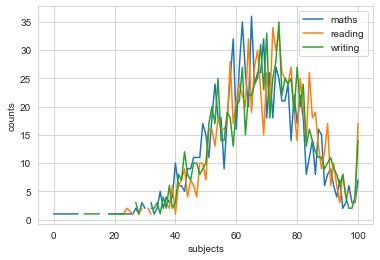

In [64]:
plt.figure(figsize=(15,6))
m = pd.concat([df2,df3,df4], axis=1)
m.plot()
plt.xlabel('subjects')
plt.ylabel('counts')
m.value_counts().head()

In [65]:
a=[df2.mean(),df2.median(),df2.mode(),df3.mean(),df3.median(),df3.mode(),df4.mean(),df4.median(),df4.mode()]
a

[maths    12.345679
 dtype: float64,
 maths    10.0
 dtype: float64,
    maths
 0      1,
 reading    13.888889
 dtype: float64,
 reading    14.0
 dtype: float64,
    reading
 0        1,
 writing    12.987013
 dtype: float64,
 writing    11.0
 dtype: float64,
    writing
 0        1]

#### Find the percentage of marks [maths,reading,writing] 

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

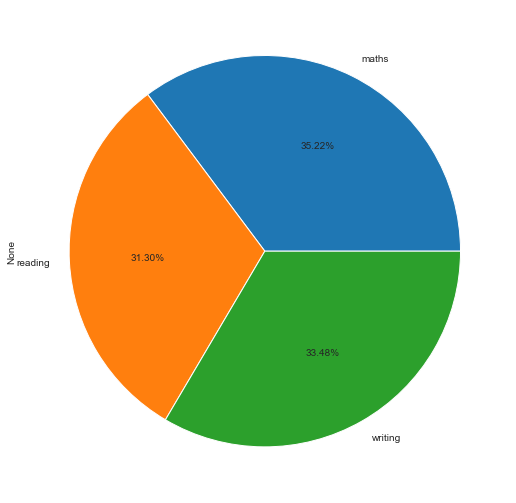

In [66]:
m = pd.concat([df2,df3,df4], axis=1).count().plot(kind='pie',figsize=(10,9),autopct='%0.2f%%')
plt.pie 

#### Find the relation between qualification  and lunch? Find which qualification has received highest and lowest free-educed ?

In [67]:
df['qualification'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: qualification, dtype: int64

In [68]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: qualification, dtype: int64

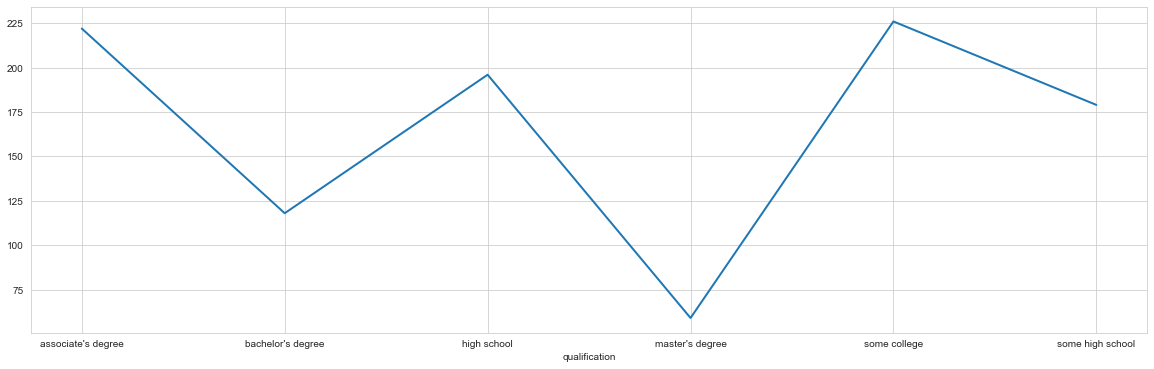

In [69]:
q = df.groupby(by='qualification').count()
plt.figure(figsize = (20,6))
q['lunch'].plot(linewidth=2)
df['qualification'].value_counts()

<AxesSubplot:xlabel='count', ylabel='qualification'>

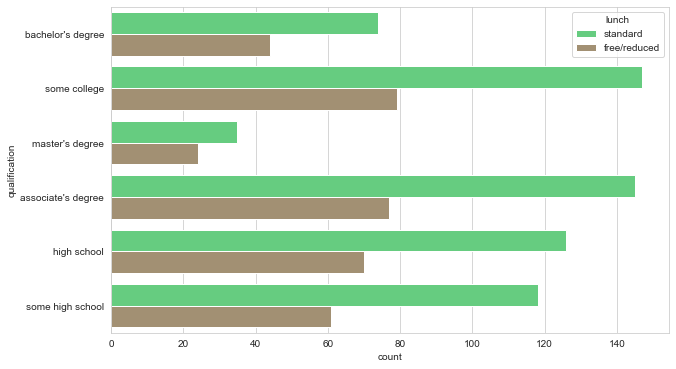

In [70]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(y='qualification',hue='lunch',color='darkred',data=df,palette='terrain')

# Conclusion

In this csv we get to know about the data about 

In [72]:
import pandas as pd
import numpy as np
   
# Dictionary
df1 = {
     'Name': ['abc', 'bcd', 'cde',
             'def', 'efg', 'fgh',
             'ghi'],
     'Math_score': [52, 87, 49,
                   74, 28, 59,
                   48]}
   
# Create a DataFrame
df1 = pd.DataFrame(df1, 
                   columns = ['Name',
                             'Math_score'])
  
# Calculating Percentage
df1['percent'] = (df1['Math_score'] / 
                  df1['Math_score'].sum()) * 100
  
# Show the dataframe
df1



,Name,Math_score,percent
0,abc,52,13.098237
1,bcd,87,21.914358
2,cde,49,12.342569
3,def,74,18.639798
4,efg,28,7.052897
5,fgh,59,14.861461
6,ghi,48,12.090680
